# Użycie metody Monte Carlo do symulacji ruchów Browna


30-06-2020 Tomasz Solga - 108138
---

### Program wykorzystujący generator liczb pseudolosowych do symulacji ruchów Browna
1. [Pobranie liczby n ruchów cząsteczki](#input)  
2. [Algorytm](#algorithm)
3. [Długość wektora przesunięcia cząsteczki po *n* krokach](#vector)
4. [Graficzna reprezentacja trajektorii przemieszczenia cząsteczki](#chart)
5. [Wymagane zależności](#required)

<a name = "intro"></a>
Metody Monte carlo to ogólna nazwa metod rozwiązywania problemów występujących w różnych dziedzinach, np. fizyka, matematyka, ekonomia, wykorzystując generator liczb pseudolosowych.
Problem będzie rozwiązywany w języku python następująco: cząsteczka startuje w punkcie (0, 0) i w tym punkcie tworzymy arkusz z danymi. Kolejnym krokiem jest losowanie kąta kierunku przemieszczenia cząsteczki - obliczanie za pomocą generatora liczb pseudolosowych z przedziału <0; 2π> i przemieszczenie jej w tym kierunku. Nowy punkt zostaje dopisany do arkusza z danymi. Pętla jest powtarzana *n* razy, gdzie *n* to ilość ruchów cząsteczki. Po *n* ruchach wyznaczamy położenie cząsteczki po *n* krokach, oraz wyznaczamy długość wektora przesunięcia cząsteczki po *n* krokach
$$\vec{\mathbf{|S|}}=\sqrt({x_n^2}+{y_n^2})$$ <br>
Następnie dla wyznaczenia współrzędnych: <br>
$$x_k = x_{k-1} + r * cos⁡φ $$ <br>
$$y_k = y_{k-1} + r * cos⁡φ $$ <br>
gdzie k = 0, 1, 2, ..., n; r = 1(długość jednego kroku); φ kąt kierunku ruchu cząsteczki.


<br><br>
# Program
<br>
- Wczytanie bibliotek wymaganych do poprawnego działania programu.

In [1]:
import math
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
import xlsxwriter
import watermark

- Wstępna inicjalizacja zmiennych oraz stałych.

In [2]:
variableInitialization = lambda counter: [0 for _ in range(counter)]
x, y, s, fi = variableInitialization(4)
PI = 3.14159
i = 3

<a name = "input"></a>
## 1. Pobranie liczby ruchów cząsteczki

In [3]:
n = int(input("Ilość ruchów? "))

Ilość ruchów? 10


- Stworzenie pliku danych `test.xlsx` 
- Inicjacja wyjściowych współrzędnych (0, 0)

In [4]:
workbook = xlsxwriter.Workbook('test.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A' + str(1), 'x')
worksheet.write('B' + str(1), 'y')
worksheet.write('A' + str(2), 0)
worksheet.write('B' + str(2), 0)

0

<a name = "algorithm"></a>
## 2. Algorytm
- działanie algorytmu zostało szczegółowo opisane we [wstępie](#intro)

In [5]:
while i <= n+1:
    fi = uniform(0, 32767) / (32767 + 1) * 2 * PI
    # 0-32767 / ( 32767 + 1) * 2 * PI
    x += math.cos(fi)
    y += math.sin(fi)

    print(fi)
    print(x)
    print(y)

    worksheet.write('A' + str(i), x)
    worksheet.write('B' + str(i), y)
    i += 1


5.331874251397905
0.5806161567509913
-0.8141774244719072
5.830539620029843
1.4799093263118368
-1.2515237348269947
0.30638331027782945
2.433339967760919
-0.9499113810581354
6.117957507768524
3.4197208809294324
-1.1143884133053443
0.6303445579449997
4.227545346773913
-0.5249652780425011
1.660869631497632
4.13759378979842
0.4709808637732522
4.668073905743096
4.09329321824746
-0.5280373839881479
4.35640901644058
3.7447841603079777
-1.465342796612088
3.6991415348224947
2.8962295952856074
-1.9944506780310816


<a name = "vector"></a>
## 3. Obliczenie wektora przesunięcia cząsteczki po *n* krokach
- wyznaczanie długości wektora przesunięcia cząsteczki po *n* krokach

In [6]:
s = math.sqrt(x*x + y*y)
print("\n\n\nCzasteczka po " + str(n) + " krokach przemiescila sie o odleglosc " + str(s) + "\n\n\n")




Czasteczka po 10 krokach przemiescila sie o odleglosc 3.5165294504250744





In [7]:
workbook.close()

<a name = "chart"></a>
## 4. Graficzna reprezentacja trajektorii przemieszczenia cząsteczki
- wykorzystanie biblioteki matplotolib do wizualizacji arkusza danych<br>
df - data frame

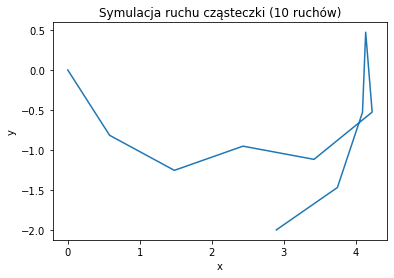

In [8]:
df = pd.read_excel('test.xlsx', 'Sheet1')
plt.plot(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Symulacja ruchu cząsteczki ' + '(' + str(n) + ' ruchów)')
plt.show()

<a name = "required"></a>
## 5. Wymagane zależności


In [9]:
%load_ext watermark
%watermark -v -m -p pandas,matplotlib,xlsxwriter,xlrd,watermark

CPython 3.8.3
IPython 7.15.0

pandas 1.0.5
matplotlib 3.2.2
xlsxwriter 1.2.9
xlrd 1.2.0
watermark 2.0.2

compiler   : MSC v.1924 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
